# GD for bostons dataset

In [12]:
import numpy as np
data = np.loadtxt("train_ML5.csv", delimiter=',')
data.shape

(379, 14)

In [28]:
from sklearn import model_selection
data_train, data_test = model_selection.train_test_split(data)
print(data_train.shape)
print(data_test.shape)

x_train = data_train[:,:13]
y_train = data_train[:,13]

x_test = data_test[:,:13]
y_test = data_test[:,13]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_train)
print(x_test)

(284, 14)
(95, 14)
(284, 13)
(95, 13)
(284,)
(95,)
[[-0.32498353 -0.48772236 -0.43725801 ...  1.17646583 -0.74211198
  -0.13499622]
 [-0.41406187  2.94584308 -1.40317788 ... -2.70737911  0.38951945
  -0.8456773 ]
 [-0.41219421 -0.48772236  0.40609801 ... -1.13534664  0.39664628
  -0.73774349]
 ...
 [-0.40161817  0.04877224 -0.47665354 ... -1.50523663  0.44105193
   0.91070021]
 [-0.22555854 -0.48772236  1.2319449  ... -1.73641788  0.1768109
   0.2028226 ]
 [-0.37549071  0.45650813 -0.76993132 ...  0.29797709  0.44105193
  -1.27741255]]
[[-0.39316013 -0.48772236 -0.07978012 ...  0.06679585  0.37570436
   0.473358  ]
 [-0.32696414  0.370669   -1.04569998 ... -2.52243411  0.30037921
   0.29954251]
 [-0.41344591  1.76555496 -0.84872237 ... -0.85792914  0.16496939
  -0.44057507]
 ...
 [-0.41097743 -0.48772236 -0.75534039 ...  0.34421334  0.44105193
  -0.41674552]
 [-0.39989373 -0.48772236 -0.61672651 ... -0.2568579   0.4142989
  -0.7307348 ]
 [-0.34584335 -0.48772236 -0.72032214 ... -0.4880

In [29]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(x_train)
print(x_test)

[[-0.34539114 -0.49842551 -0.50411018 ...  1.11722862 -0.62150618
  -0.18397424]
 [-0.42108072  2.83910106 -1.444421   ... -2.91737717  0.425889
  -0.87333545]
 [-0.41949377 -0.49842551  0.31688627 ... -1.28432245  0.43248533
  -0.76863957]
 ...
 [-0.41050735  0.02306301 -0.54246123 ... -1.66857062  0.47358552
   0.83035212]
 [-0.26091004 -0.49842551  1.1208378  ... -1.90872573  0.22901403
   0.14371028]
 [-0.38830693  0.41939429 -0.82796346 ...  0.20463921  0.47358552
  -1.29211898]]
[[-0.40332058 -0.49842551 -0.15610996 ... -0.03551589  0.41310228
   0.40612983]
 [-0.34707406  0.33595613 -1.09642077 ... -2.72525308  0.34338418
   0.23752867]
 [-0.42055734  1.6918263  -0.90466555 ... -0.99613632  0.21805398
  -0.48038597]
 ...
 [-0.41845988 -0.49842551 -0.81375937 ...  0.25267023  0.47358552
  -0.45727129]
 [-0.4090421  -0.49842551 -0.6788205  ... -0.37173304  0.44882392
  -0.76184114]
 [-0.36311566 -0.49842551 -0.77966954 ... -0.61188815  0.40752077
  -0.42327912]]


In [30]:
def step_gradient(points, learning_rate, coefficients):
    m = coefficients[:-1]  # Extracting coefficients for features
    c = coefficients[-1]   # Extracting the intercept
    m_slope = np.zeros_like(m)
    c_slope = 0
    M = len(points)
    for i in range(M):
        x = points[i, :-1]  # Extract features (all but the last column)
        y = points[i, -1]   # Extract the target variable (last column)
        m_slope += (-2/M) * (y - np.dot(m, x) - c) * x
        c_slope += (-2/M) * (y - np.dot(m, x) - c)
    new_coefficients = np.zeros_like(coefficients)
    new_coefficients[:-1] = m - learning_rate * m_slope
    new_coefficients[-1] = c - learning_rate * c_slope
    return new_coefficients

In [31]:
def gd(points, learning_rate, num_iteration):
    coefficients = np.zeros(points.shape[1])  # Initialize coefficients with zeros
    for i in range(num_iteration):
        coefficients = step_gradient(points, learning_rate, coefficients)
        m = coefficients[:-1]
        c = coefficients[-1]
        print(i, " Cost: ", cost(points, m, c))
    return coefficients[:-1], coefficients[-1]

In [32]:
def cost(points, m, c):
    total_cost = 0
    M = len(points)
    for i in range(M):
        x = points[i, :-1]
        y = points[i, -1]
        total_cost += (1/M) * ((y - np.dot(m, x) - c) ** 2)
    return total_cost

In [33]:
def predict(X, m, c):
    return np.dot(X, m) + c

In [34]:
def score(y_test, y_test_pred):
    u = ((y_test - y_test_pred) ** 2).sum()
    v = ((y_test - y_test.mean()) ** 2).sum()
    return 1 - u / v

In [35]:
learning_rate = 0.01
num_iteration = 1000
m, c = gd(data_train, learning_rate, num_iteration)
print("m, c: ",m, c)

#test data
y_test_pred = predict(x_test, m, c)
print("Test Score: ", score(y_test, y_test_pred))

#train data
y_train_pred = predict(x_train, m, c)
print("Train Score: ", score(y_train, y_train_pred))

0  Cost:  541.999134224985
1  Cost:  519.067744582021
2  Cost:  497.62319130299704
3  Cost:  477.4678342658988
4  Cost:  458.4461570849884
5  Cost:  440.4345435424366
6  Cost:  423.3335978827717
7  Cost:  407.0623731620644
8  Cost:  391.5540308856634
9  Cost:  376.7525744211685
10  Cost:  362.6103880918433
11  Cost:  349.086380904013
12  Cost:  336.1445841368832
13  Cost:  323.75308972102755
14  Cost:  311.8832445992682
15  Cost:  300.50903745993173
16  Cost:  289.60663012676713
17  Cost:  279.15399780846695
18  Cost:  269.1306513484289
19  Cost:  259.5174213178575
20  Cost:  250.2962888217267
21  Cost:  241.45025165678237
22  Cost:  232.96321728807288
23  Cost:  224.81991623114166
24  Cost:  217.0058310177986
25  Cost:  209.5071371168215
26  Cost:  202.31065307640577
27  Cost:  195.4037978271986
28  Cost:  188.7745535892067
29  Cost:  182.41143320463232
30  Cost:  176.3034510032081
31  Cost:  170.44009652040734
32  Cost:  164.81131054968986
33  Cost:  159.40746313091847
34  Cost:  154

292  Cost:  24.4288622844031
293  Cost:  24.424331243671485
294  Cost:  24.419846777429985
295  Cost:  24.415408164655535
296  Cost:  24.41101470095049
297  Cost:  24.40666569804832
298  Cost:  24.402360483336377
299  Cost:  24.39809839939427
300  Cost:  24.39387880354801
301  Cost:  24.389701067439134
302  Cost:  24.385564576607905
303  Cost:  24.38146873009081
304  Cost:  24.37741294003109
305  Cost:  24.373396631302448
306  Cost:  24.36941924114504
307  Cost:  24.365480218813516
308  Cost:  24.36157902523681
309  Cost:  24.357715132688817
310  Cost:  24.353888024470088
311  Cost:  24.350097194599822
312  Cost:  24.346342147517955
313  Cost:  24.342622397796813
314  Cost:  24.338937469862337
315  Cost:  24.335286897723996
316  Cost:  24.331670224713772
317  Cost:  24.328087003233183
318  Cost:  24.32453679450868
319  Cost:  24.321019168354702
320  Cost:  24.31753370294444
321  Cost:  24.314079984587718
322  Cost:  24.31065760751585
323  Cost:  24.30726617367371
324  Cost:  24.3039052

588  Cost:  23.92772295663481
589  Cost:  23.92721326785017
590  Cost:  23.926706651173305
591  Cost:  23.926203085100777
592  Cost:  23.92570254829823
593  Cost:  23.92520501959877
594  Cost:  23.92471047800165
595  Cost:  23.924218902670603
596  Cost:  23.923730272932463
597  Cost:  23.923244568275894
598  Cost:  23.922761768349663
599  Cost:  23.92228185296143
600  Cost:  23.92180480207633
601  Cost:  23.921330595815526
602  Cost:  23.92085921445485
603  Cost:  23.920390638423566
604  Cost:  23.919924848302788
605  Cost:  23.919461824824392
606  Cost:  23.919001548869602
607  Cost:  23.91854400146771
608  Cost:  23.918089163794654
609  Cost:  23.917637017171998
610  Cost:  23.917187543065477
611  Cost:  23.916740723083787
612  Cost:  23.916296538977342
613  Cost:  23.91585497263714
614  Cost:  23.915416006093427
615  Cost:  23.914979621514536
616  Cost:  23.9145458012057
617  Cost:  23.914114527607975
618  Cost:  23.913685783296867
619  Cost:  23.913259550981348
620  Cost:  23.91283

887  Cost:  23.85330215427761
888  Cost:  23.853195156439938
889  Cost:  23.853088632729378
890  Cost:  23.852982580539717
891  Cost:  23.85287699728165
892  Cost:  23.85277188038216
893  Cost:  23.852667227284797
894  Cost:  23.852563035449375
895  Cost:  23.85245930235189
896  Cost:  23.852356025484443
897  Cost:  23.85225320235511
898  Cost:  23.852150830487844
899  Cost:  23.852048907422237
900  Cost:  23.851947430713714
901  Cost:  23.851846397933024
902  Cost:  23.851745806666482
903  Cost:  23.85164565451565
904  Cost:  23.8515459390973
905  Cost:  23.851446658043365
906  Cost:  23.85134780900066
907  Cost:  23.851249389631015
908  Cost:  23.851151397610984
909  Cost:  23.851053830631802
910  Cost:  23.850956686399346
911  Cost:  23.850859962633898
912  Cost:  23.85076365707018
913  Cost:  23.850667767457203
914  Cost:  23.850572291558127
915  Cost:  23.850477227150183
916  Cost:  23.850382572024657
917  Cost:  23.85028832398668
918  Cost:  23.85019448085518
919  Cost:  23.85010

In [36]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg1.fit(x_train,y_train)

LinearRegression()

In [37]:
alg1.coef_

array([-1.0240312 ,  0.33569484, -0.13145884,  0.94480325, -2.45390899,
        1.82537298, -0.07466415, -2.82168534,  2.22777763, -1.28859754,
       -2.04706003,  0.45197243, -4.38846508])

In [38]:
alg1.intercept_

22.016549295774645

In [39]:
y_pred = alg1.predict(x_test)

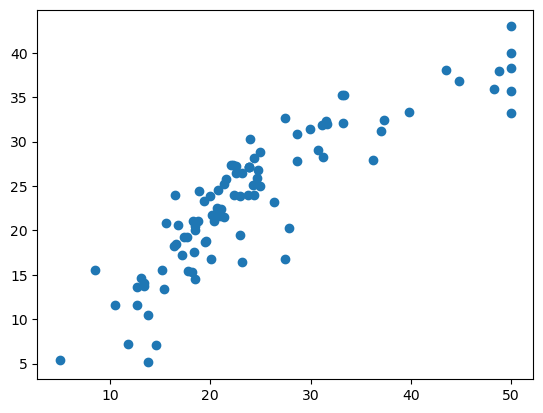

In [40]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.show()

In [41]:
alg1.score(x_test,y_test)

0.7586426428016722

In [42]:
alg1.score(x_train,y_train)

0.7092674304802447